<h1><center>Laboratorio 8: Predicciones y Recomendaciones üîÆ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebasti√°n Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicol√°s Ojeda, Eduardo Moya

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados**

- Nombre de alumno 1: Melanie Pe√±a Torres
- Nombre de alumno 2: Valentina Rojas Osorio

### **Link de repositorio de GitHub:** [Link](https://github.com/melaniejalea/Laboratorios-MDS7202/tree/lab8/Laboratorio%208)

## Temas a tratar
- Series de Tiempo.
- Predicciones v√≠a `Prophet`.
- Implementar un sistema de recomendaci√≥n utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- C√≥digo que no se pueda ejecutar, no ser√° revisado.

### Objetivos principales del laboratorio
- Comprender qu√© es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendaci√≥n.
- Entender estructura y conocer casos de estudio.


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposici√≥n aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuaci√≥n de a continuaci√≥n se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicci√≥n hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresi√≥n lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresi√≥n y luego las "une" de manera de representar toda la regi√≥n, como se puede ver en la ecuaci√≥n siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        Œ∑_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        Œ∑_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        Œ∑_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        Œ∑_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y as√≠ hasta el punto $b_{nb}$ correspondiente al √∫ltimo punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor informaci√≥n de Prophet y como utilizarla, pueden ver su [documentaci√≥n](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un peque√±o tutorial de la librer√≠a.

## **Prophet, pr√°ctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la marat√≥n y como sabe que correr una marat√≥n requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer m√°s balanceado, pero tambi√©n necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es as√≠ como ustedes tendr√°n que ayudar a Don Sergio a cumplir su sue√±o de correr la marat√≥n de Santiago, manteniendo su econom√≠a del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, har√°n uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio m√≠nimo de venta.
* `Maximum:` Precio m√°ximo de venta.
* `Average:` Precio promedio de venta.




In [ ]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Direcci√≥n donde tiene los archivos en el Drive'
except:
    print('Ignorando conexi√≥n drive-colab')

Mounted at /content/drive


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la secci√≥n:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gr√°ficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar m√°s frutas y verduras a su dieta. Es por ello que decid√≠o a√±adir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [257]:
# Leer el dataset
df = pd.read_csv('/content/fruit_vegetables.csv')
df.head(10)

SN             Commodity        Date Unit  Minimum  Maximum  Average
0   0    Tomato Big(Nepali)  2013-06-16   Kg     35.0     40.0     37.5
1   1   Tomato Small(Local)  2013-06-16   Kg     26.0     32.0     29.0
2   2            Potato Red  2013-06-16   Kg     20.0     21.0     20.5
3   3          Potato White  2013-06-16   Kg     15.0     16.0     15.5
4   4    Onion Dry (Indian)  2013-06-16   Kg     28.0     30.0     29.0
5   5         Carrot(Local)  2013-06-16   Kg     30.0     35.0     32.5
6   6        Cabbage(Local)  2013-06-16   Kg      6.0     10.0      8.0
7   7           Cauli Local  2013-06-16   Kg     30.0     35.0     32.5
8   8           Raddish Red  2013-06-16   Kg     35.0     40.0     37.5
9   9  Raddish White(Local)  2013-06-16   Kg     25.0     30.0     27.5

In [258]:
df.tail(10)

SN             Commodity        Date Unit  Minimum  Maximum  \
197151  197151  Chilli Green(Akbare)  2021-05-13   KG    140.0    150.0   
197152  197152              Capsicum  2021-05-13   Kg     75.0     80.0   
197153  197153          Garlic Green  2021-05-13   Kg     50.0     60.0   
197154  197154       Coriander Green  2021-05-13   Kg     80.0     90.0   
197155  197155    Garlic Dry Chinese  2021-05-13   Kg    240.0    250.0   
197156  197156     Garlic Dry Nepali  2021-05-13   Kg    100.0    120.0   
197157  197157      Fish Fresh(Rahu)  2021-05-13   KG    270.0    280.0   
197158  197158   Fish Fresh(Bachuwa)  2021-05-13   KG    225.0    235.0   
197159  197159    Fish Fresh(Chhadi)  2021-05-13   KG    220.0    230.0   
197160  197160   Fish Fresh(Mungari)  2021-05-13   KG    240.0    250.0   

        Average  
197151    145.0  
197152     77.5  
197153     55.0  
197154     85.0  
197155    245.0  
197156    110.0  
197157    275.0  
197158    230.0  
197159    225.0  
197160    245.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [259]:
# Crear m√°scara con elementos de b√∫squeda y seleccionar

# Notamos que las fechas no son de tipo "datetime", por lo que las formateamos para que sean de este tipo
df['Date'] = pd.to_datetime(df['Date'])

# Una lista con las comidas de Don Sergio!
comidita = ['Tomato', 'Tofu', 'Lettuce', 'Apple', 'Banana']

# Verificamos que la columna 'Commodity' contiene la lista de Don Sergio, se tienen valores de "True" y "False" para ver los registros
mask_comidita =  df['Commodity'].str.contains('|'.join(comidita))

# Se aplica la m√°scara al dataframe original
df_mask = df[mask_comidita]
df_mask

SN            Commodity       Date Unit  Minimum  Maximum  Average
0            0   Tomato Big(Nepali) 2013-06-16   Kg     35.0     40.0     37.5
1            1  Tomato Small(Local) 2013-06-16   Kg     26.0     32.0     29.0
40          40              Lettuce 2013-06-16   Kg     55.0     60.0     57.5
48          48                 Tofu 2013-06-16   Kg     55.0     60.0     57.5
50          50        Apple(Jholey) 2013-06-16   Kg    100.0    120.0    110.0
...        ...                  ...        ...  ...      ...      ...      ...
197075  197075  Tomato Small(Terai) 2021-05-13   KG     35.0     40.0     37.5
197120  197120              Lettuce 2021-05-13   Kg     50.0     60.0     55.0
197126  197126                 Tofu 2021-05-13   Kg     90.0    100.0     95.0
197127  197127          Apple(Fuji) 2021-05-13   KG    250.0    270.0    260.0
197128  197128               Banana 2021-05-13  Doz    100.0    110.0    105.0

[18142 rows x 7 columns]

In [261]:
# Verificamos que tipo de datos hay en este nuevo dataframe
df_mask['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Lettuce', 'Tofu',
       'Apple(Jholey)', 'Banana', 'Tomato Small(Tunnel)', 'Apple(Fuji)',
       'Tomato Big(Indian)', 'Tomato Small(Indian)',
       'Tomato Small(Terai)'], dtype=object)

In [262]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo
df_agrupado = df_mask.groupby('Date')['Average'].sum().reset_index()
df_agrupado.head(10)

Date  Average
0 2013-06-16    366.5
1 2013-06-17    350.0
2 2013-06-18    336.5
3 2013-06-19    358.5
4 2013-06-20    346.5
5 2013-06-21    335.0
6 2013-06-25    350.0
7 2013-06-26    342.5
8 2013-06-27    328.5
9 2013-06-28    333.5

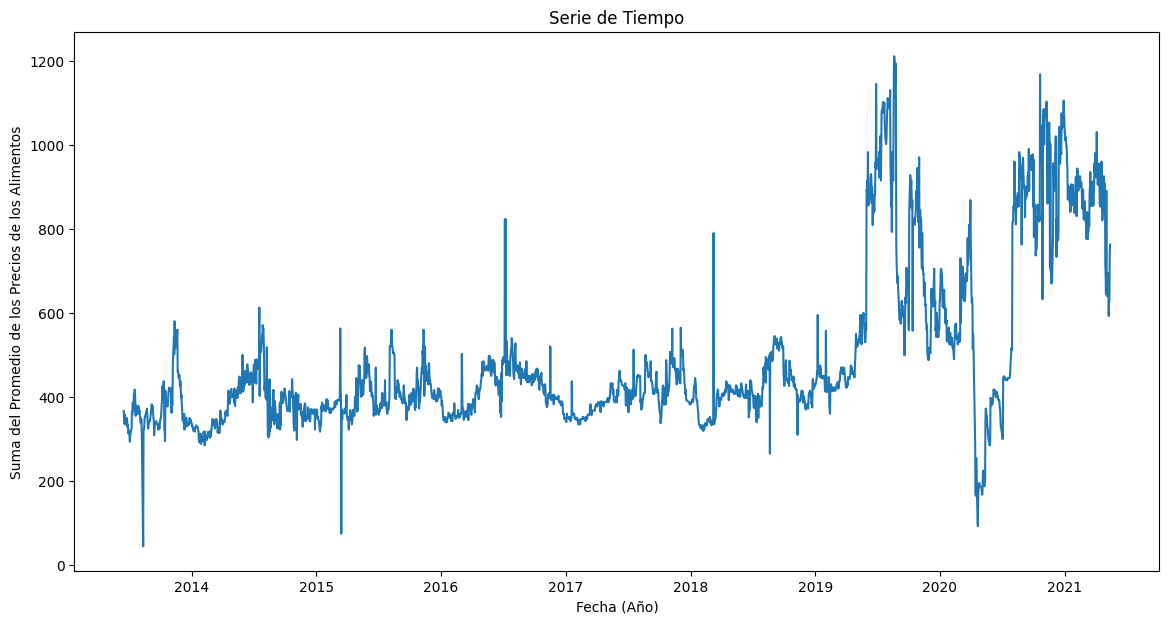

In [263]:
# Graficar serie de tiempo

plt.figure(figsize=(14, 7))
plt.plot(df_agrupado['Date'], df_agrupado['Average'])
plt.xlabel('Fecha (A√±o)')
plt.ylabel('Suma del Promedio de los Precios de los Alimentos')
plt.title('Serie de Tiempo')
plt.show()

In [275]:
# Realizar descomposici√≥n de la se√±al, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
# P√°gina que usamos para guiarnos : https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

series = df_agrupado.set_index('Date')['Average']
result = seasonal_decompose(series, model='additive', period = 365) #Ver que onda el period
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: trend, Length: 2753, dtype: float64
Date
2013-06-16     0.885974
2013-06-17    43.154076
2013-06-18    67.151140
2013-06-19    73.518459
2013-06-20    83.650749
                ...    
2021-05-09   -87.152578
2021-05-10   -90.882323
2021-05-11   -92.902871
2021-05-12   -94.635748
2021-05-13   -94.404828
Name: seasonal, Length: 2753, dtype: float64
Date
2013-06-16   NaN
2013-06-17   NaN
2013-06-18   NaN
2013-06-19   NaN
2013-06-20   NaN
              ..
2021-05-09   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
Name: resid, Length: 2753, dtype: float64
Date
2013-06-16    366.5
2013-06-17    350.0
2013-06-18    336.5
2013-06-19    358.5
2013-06-20    346.5
              ...  
2021-05-09    592.5
2021-05-10    625.0
2021-05-11    628.0
2021-05-12    745.0
2021-05-13   

Notamos que al cambiar mucho el valor de *period* dentro de *seasonal_decompose*, los valores variaban demasiado, incluyendo la cantidad de valores num√©ricos y NaNs entre los par√°metros. Probamos con varios valores, como 30/31, para obtener una periodicidad mensual; sin embargo, al analizar los datos, no encontramos que tuvieran sentido. Al probar con una periodicidad de 356 d√≠as, pudimos notar espec√≠ficamente que la tendencia ten√≠a m√°s sentido, dado que se puede observar c√≥mo, a lo largo de los a√±os, la tendencia va aumentando, lo cual concuerda al analizar la serie de tiempo que presenta mayores valores al aumentar los a√±os con una leve ca√≠da entre los a√±os 2020 y 2021.

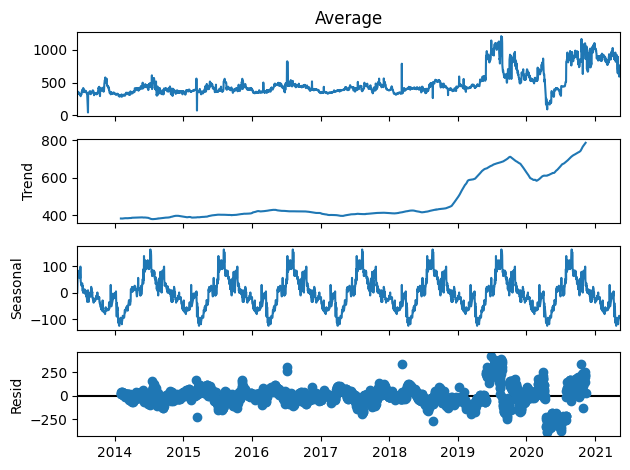

In [276]:
result.plot()
pyplot.show()

In [278]:
# Verificamos cuales son las fechas, en espec√≠fico, los a√±os presentes en los
# l√≠mites del dataframe
fecha_vieja = df['Date'].min()
fecha_nueva = df['Date'].max()
print('Fecha m√°s antigua del df : ', fecha_vieja)
print('Fecha m√°s nueva del df : ', fecha_nueva)

Fecha m√°s antigua del df :  2013-06-16 00:00:00
Fecha m√°s nueva del df :  2021-05-13 00:00:00


In [279]:
# Realizar Hold Out de 80/20
# Desarrollamos esta parte de manera similar a lo planteado en la clase 16!

df_agrupado['set'] = np.where(df_agrupado['Date'] >= df_agrupado['Date'].quantile(0.8), 'test', 'train')

df_train = df_agrupado[df_agrupado['set'] == 'train'].copy()
df_test = df_agrupado[df_agrupado['set'] == 'test'].copy()

print(f'% destinado a train: {len(df_train) / len(df_agrupado):.2f}')
print(f'% destinado a test: {len(df_test) / len(df_agrupado):.2f}')

% destinado a train: 0.80
% destinado a test: 0.20


#### **1.2 Modelo Prophet**

A continuaci√≥n se genera un modelo Prophet para la predicci√≥n. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`. ‚úÖ
2. Entrenar modelo. ‚úÖ
3. Generar predicci√≥n. Notar que el dataframe de predicci√≥n solo contiene una columna con nombre `ds`, al inicio.‚úÖ

In [17]:
#instalamos prophet
!pip install prophet

In [280]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**1. Generar dataframes de entrenamiento y testeo**

 Renombramos las columnas del dataframe original para poder aplicarlas bien en el modelo, el cual recibe los argumentos de 'ds' e 'y'. Notar que pasamos la columna de 'Date' a datetime en la primera parte del laboratorio!

* ds : Date
* y : Average

In [281]:
# Respuesta
# Set de entrenamiento
df_new_train = df_train.drop("set", axis = 'columns')
df_new_train.columns = ['ds', 'y']
df_new_train.head(10)

ds      y
0 2013-06-16  366.5
1 2013-06-17  350.0
2 2013-06-18  336.5
3 2013-06-19  358.5
4 2013-06-20  346.5
5 2013-06-21  335.0
6 2013-06-25  350.0
7 2013-06-26  342.5
8 2013-06-27  328.5
9 2013-06-28  333.5

In [282]:
# Set de prueba
df_new_test = df_test.drop("set", axis = 'columns')
df_new_test.columns = ['ds', 'y']
df_new_test.head(10)

ds      y
2202 2019-10-31  925.0
2203 2019-11-01  970.0
2204 2019-11-02  755.0
2205 2019-11-03  842.5
2206 2019-11-04  845.0
2207 2019-11-05  830.0
2208 2019-11-06  825.0
2209 2019-11-07  820.0
2210 2019-11-08  735.0
2211 2019-11-09  705.0

**2. Modelo y entrenamiento**

In [283]:
# Respuesta, tal vez si menciono m√°s arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/aklr0jhr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/n6jtppdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46443', 'data', 'file=/tmp/tmpw_v8m7vl/aklr0jhr.json', 'init=/tmp/tmpw_v8m7vl/n6jtppdz.json', 'output', 'file=/tmp/tmpw_v8m7vl/prophet_modelpfl9lzyj/prophet_model-20240526234801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:48:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicci√≥n.**

¬øQu√© muestra el dataframe de predicci√≥n una vez realizada la predicci√≥n? ¬øQu√© siginifican las distintas columnas? ‚úÖ

In [333]:
# Respuesta
forecast = model.predict(df_new_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds         yhat   yhat_lower   yhat_upper
541 2021-05-04  1406.375445  1256.887612  1543.300391
542 2021-05-05  1409.905754  1260.118369  1532.891573
543 2021-05-06  1410.322421  1265.439754  1533.023532
544 2021-05-07  1417.267646  1269.511332  1557.622568
545 2021-05-08  1412.676104  1262.400518  1545.527375
546 2021-05-09  1415.693645  1271.955196  1559.272931
547 2021-05-10  1416.533570  1279.196656  1549.032782
548 2021-05-11  1420.115918  1278.166591  1547.433410
549 2021-05-12  1423.718813  1274.697473  1560.853449
550 2021-05-13  1424.382896  1281.607347  1552.901296

In [334]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2202 non-null   datetime64[ns]
 1   y       2202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.6 KB


In [335]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          551 non-null    datetime64[ns]
 1   trend                       551 non-null    float64       
 2   yhat_lower                  551 non-null    float64       
 3   yhat_upper                  551 non-null    float64       
 4   trend_lower                 551 non-null    float64       
 5   trend_upper                 551 non-null    float64       
 6   additive_terms              551 non-null    float64       
 7   additive_terms_lower        551 non-null    float64       
 8   additive_terms_upper        551 non-null    float64       
 9   weekly                      551 non-null    float64       
 10  weekly_lower                551 non-null    float64       
 11  weekly_upper                551 non-null    float64       

Lo que se obtiene al realizar la predicci√≥n (es decir, el forecast) corresponde a un dataframe con predicciones sobre c√≥mo ser√° la variable objetivo del modelo en fechas futuras, en este caso, el precio promedio. Las columnas de este dataframe son las siguientes:

 * ds: Esta columna representa las fechas para las cuales se est√°n realizando las predicciones. Es importante notar que estas fechas est√°n sujetas a c√≥mo se distribuya el conjunto de entrenamiento, dado que si vamos a predecir 365 d√≠as (que es nuestro caso), estas fechas se generar√°n desde la fecha m√°s antigua del dataframe de entrenamiento.

* yhat: En esta columna se encuentran las predicciones de la variable objetivo, que en este caso corresponde al precio promedio de las frutas y verduras de Don Sergio!

* yhat_lower: Esta columna representa los l√≠mites inferiores de los intervalos de confianza para las predicciones. Corresponden al valor m√≠nimo que puede tener el precio promedio de los alimentos.

* yhat_upper: Aqu√≠ se presentan los l√≠mites superiores de los intervalos de confianza para las predicciones del modelo. Representan el valor m√°ximo que puede tener el precio promedio de los alimentos.

Notamos del forecast.info() que hay m√°s columnas dentro de este dataframe; sin embargo, siguiendo los pasos de la documentaci√≥n, estas son las columnas m√°s interesantes de analizar.

**Gr√°ficos de resultados**


Ahora, vemos el resultado de la predicci√≥n hecha a trav√©s de los gr√°ficos que vienen implementados en la libreria.

Se tienen gr√°ficos de la predicci√≥n del modelo y descomposici√≥n por componentes.

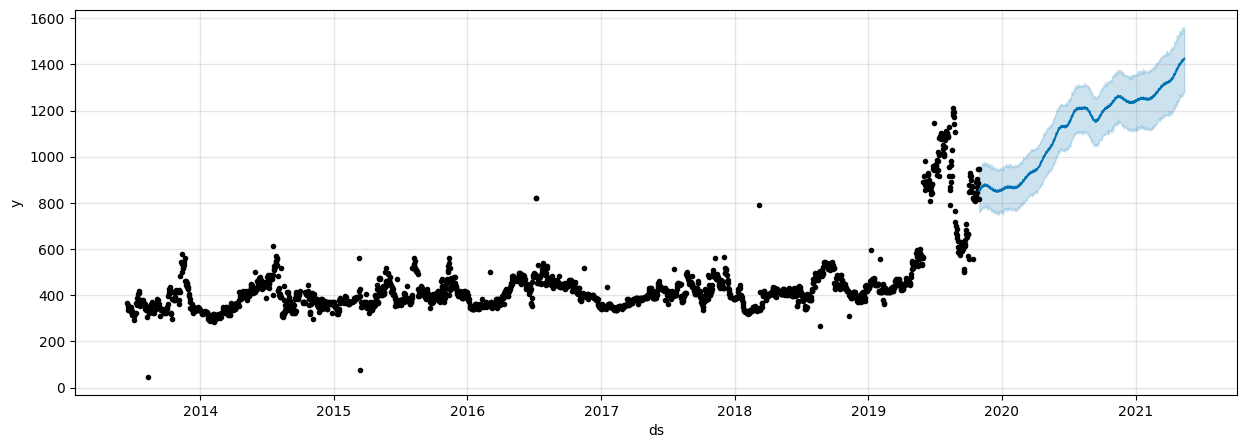

In [336]:
# plot forecast, est√°tico.
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

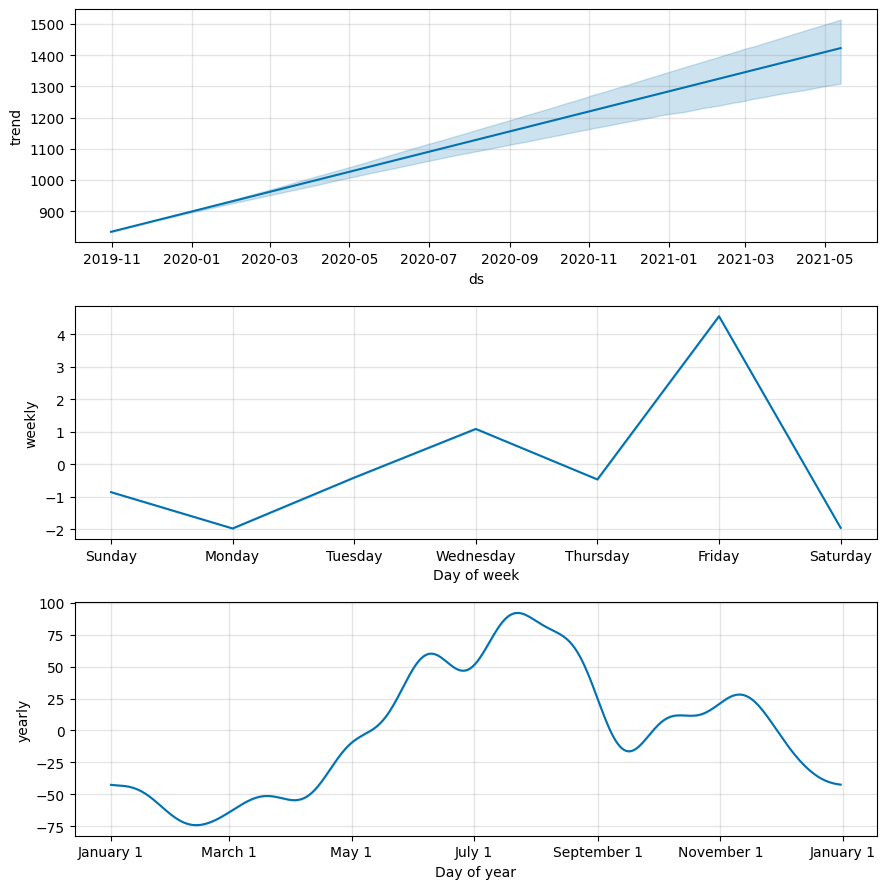

In [337]:
# descomposici√≥n por componentes, est√°tico
fig = model.plot_components(forecast)

Dentro del primer gr√°fico, podemos analizar las predicciones del modelo, que incluyen fechas nuevas. Los puntos negros representan la distribuci√≥n de los datos originales, mientras que la l√≠nea azul muestra las predicciones. La envolvente azul asumimos que deber√≠a representar el intervalo de confianza sobre los valores que pueden tomar las predicciones.

En cuanto al gr√°fico de componentes, podemos verificar la descomposici√≥n por componentes de los datos. Notamos una clara tendencia de los registros hacia un aumento en las predicciones. Tambi√©n se pueden observar los patrones semanales de los registros, destacando un gran aumento los viernes. Finalmente, podemos verificar el patr√≥n c√≠clico anual, donde se observa un aumento en los precios entre los meses de mayo y septiembre.

#### **1.3 Resultados y m√©tricas**

En la presente secci√≥n se van a ver los resultados de la predicci√≥n, comparando con los resultados originales, as√≠ se obtienen m√©tricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gr√°fica de predicci√≥n con los datos reales. Agregar tres vistas: predicci√≥n del primer 15% de los datos, 50% de los datos y 100% de la predicci√≥n. ‚úÖ
2. Calcular m√©tricas de error (RMSE, MAE, MAPE). ‚úÖ

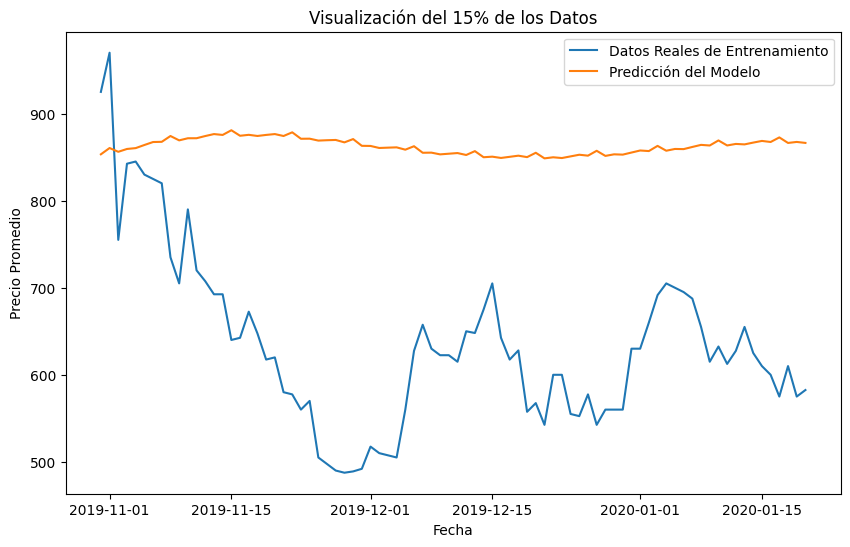

In [338]:
# Respuesta
# 15% de los datos
test_15 = int(len(df_new_test) * 0.15)
forecast_15 = int(len(forecast) * 0.15)

plt.figure(figsize=(10, 6))
plt.plot(df_new_test['ds'][:test_15], df_new_test['y'][:test_15], label='Datos Reales de Entrenamiento')
plt.plot(forecast['ds'][:forecast_15], forecast['yhat'][:forecast_15], label='Predicci√≥n del Modelo')
plt.title('Visualizaci√≥n del 15% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

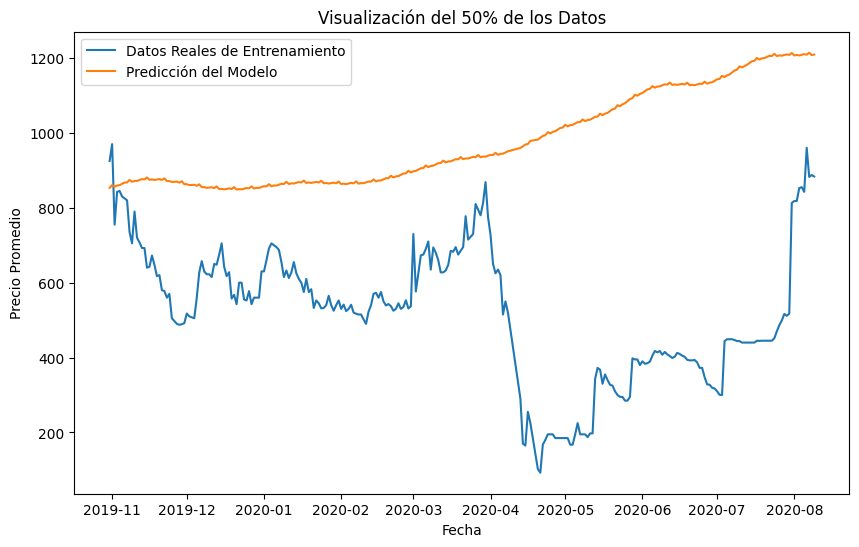

In [339]:
# 50% de los datos
test_50 = int(len(df_new_test) * 0.5)
forecast_50 = int(len(forecast) * 0.5)

plt.figure(figsize=(10, 6))
plt.plot(df_new_test['ds'][:test_50], df_new_test['y'][:test_50], label='Datos Reales de Entrenamiento')
plt.plot(forecast['ds'][:forecast_50], forecast['yhat'][:forecast_50], label='Predicci√≥n del Modelo')
plt.title('Visualizaci√≥n del 50% de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

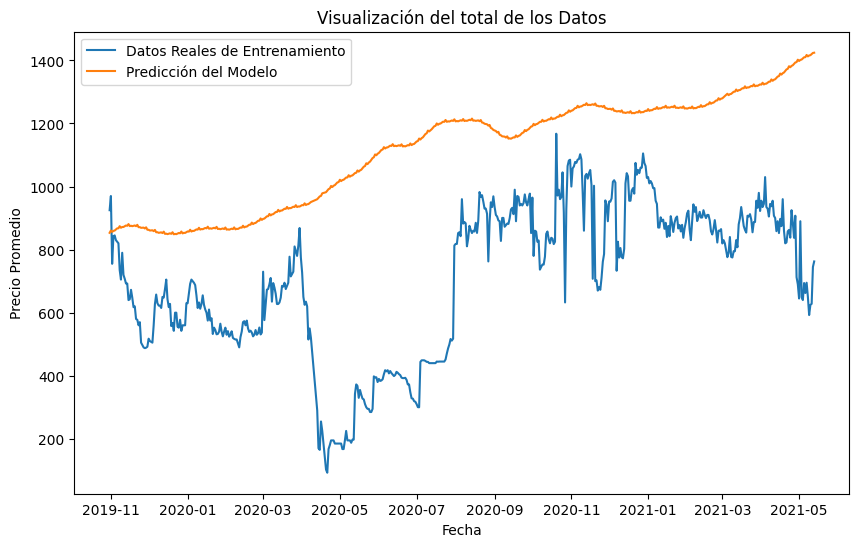

In [340]:
# 100% de los datos
plt.figure(figsize=(10, 6))
plt.plot(df_new_test['ds'], df_new_test['y'], label='Datos Reales de Entrenamiento')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicci√≥n del Modelo')
plt.title('Visualizaci√≥n del total de los Datos')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend()
plt.show()

Podemos observar en los gr√°ficos anteriores que las predicciones del modelo intentan ajustarse lo mejor posible a los datos de prueba; sin embargo, debido a la irregularidad de estos, es casi imposible obtener una l√≠nea perfectamente ajustada (a menos que se sobreentrene el modelo). No obstante, es importante se√±alar que las predicciones siguen la tendencia general de aumento de los datos, especialmente al verificar todos los datos y no solo un porcentaje de estos, a pesar de la ca√≠da entre mayo de 2020 y septiembre de 2020.

In [351]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [352]:
# Obtenemos el valor real (objetivo) y la predicci√≥n del modelo sobre este
# para poder obtener las m√©tricas

y_true = df_new_test['y']
y_pred = forecast['yhat']

# Calcular las m√©tricas de error con los datos truncados
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true,y_pred)

print("M√©tricas de Error del Primer Modelo:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

M√©tricas de Error del Primer Modelo:
RMSE: 460.0754525008516
MAE: 410.26759857848896
MAPE: 0.8588562096004088


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio tambi√©n le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`. ‚úÖ
2. Predecir las el dataframe de testeo ‚úÖ
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al a√±adir las festividades. ‚úÖ


**1. Festividades y agregar a modelo**

Para realizar esta secci√≥n nos basamos en la secci√≥n de ["Seasonality, Holiday Effects, And Regressors"](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors) de Prophet.

In [353]:
# Respuesta
holidays_cl = {
    'holiday': ['jueves_santo', 'glorias_navales'] * 6,
    'ds': pd.to_datetime([
        '2016-03-24', '2016-05-21',
        '2017-04-13', '2017-05-21',
        '2018-03-29', '2018-05-21',
        '2019-04-18', '2019-05-21',
        '2020-04-09', '2020-05-21',
        '2021-04-01', '2021-05-21'
    ]),
    'lower_window': [0] * 12,
    'upper_window': [1] * 12,
}
holidays = pd.DataFrame(holidays_cl)
new_model = Prophet(holidays=holidays)
new_model.add_country_holidays(country_name='CL')
new_model.fit(df_new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/53o8e3tu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/z8saka5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14043', 'data', 'file=/tmp/tmpw_v8m7vl/53o8e3tu.json', 'init=/tmp/tmpw_v8m7vl/z8saka5m.json', 'output', 'file=/tmp/tmpw_v8m7vl/prophet_modelodaxvd31/prophet_model-20240527014012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:40:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Seg√∫n lo discutido con la auxiliar Consuelo, estos *holidays* deber√≠an ser un puntero a estas fechas dentro del dataframe original, en lugar de que los estemos *a√±adiendo* al dataframe. De esta manera, podremos verificar la influencia de estas fechas en los precios de los alimentos de Don Sergio!

Nuestra lista original conten√≠a el Jueves Santo, Viernes Santo y el 18 de septiembre. Sin embargo, notamos en la documentaci√≥n de Prophet sobre festividades que el Viernes Santo ("Good Friday") y el 18 de septiembre (asumimos que es el "National Holiday") ya vienen incluidos, por lo que el hecho de que estemos a√±adi√©ndolos podr√≠a afectar el rendimiento del modelo. Finalmente, elegimos solo el Jueves Santo y a√±adimos el D√≠a de las Glorias Navales. La decisi√≥n sobre este d√≠a se bas√≥ en que, durante Semana Santa, si Don Sergio es religioso, el precio de las frutas y verduras deber√≠a ser importante para √©l, dado que no podr√≠a comer carne roja. Y el D√≠a de las Glorias Navales porque al abordaje muchachos.

In [354]:
new_model.train_holiday_names

0                   jueves_santo
1                glorias_navales
2                 New Year's Day
3                    Good Friday
4                  Holy Saturday
5                      Labor Day
6                       Navy Day
7     Saint Peter and Saint Paul
8       Our Lady of Mount Carmel
9                 Assumption Day
10              Independence Day
11                      Army Day
12    Meeting of Two Worlds' Day
13               Reformation Day
14               All Saints' Day
15         Immaculate Conception
16                 Christmas Day
17              National Holiday
dtype: object

**2. Predecir**

In [355]:
# Respuesta
new_forecast = new_model.predict(df_new_test)

In [356]:
new_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds         yhat   yhat_lower   yhat_upper
541 2021-05-04  1410.436197  1270.735371  1545.189177
542 2021-05-05  1413.905450  1268.030703  1547.563773
543 2021-05-06  1414.544627  1269.635134  1551.845061
544 2021-05-07  1421.768319  1279.247912  1567.714151
545 2021-05-08  1417.016741  1277.481143  1551.940561
546 2021-05-09  1419.729438  1283.420525  1568.518564
547 2021-05-10  1421.099283  1279.640175  1550.972737
548 2021-05-11  1424.226238  1288.385651  1574.293290
549 2021-05-12  1427.822789  1286.631054  1564.578036
550 2021-05-13  1428.764871  1288.196867  1574.121172

**3. Resultados**

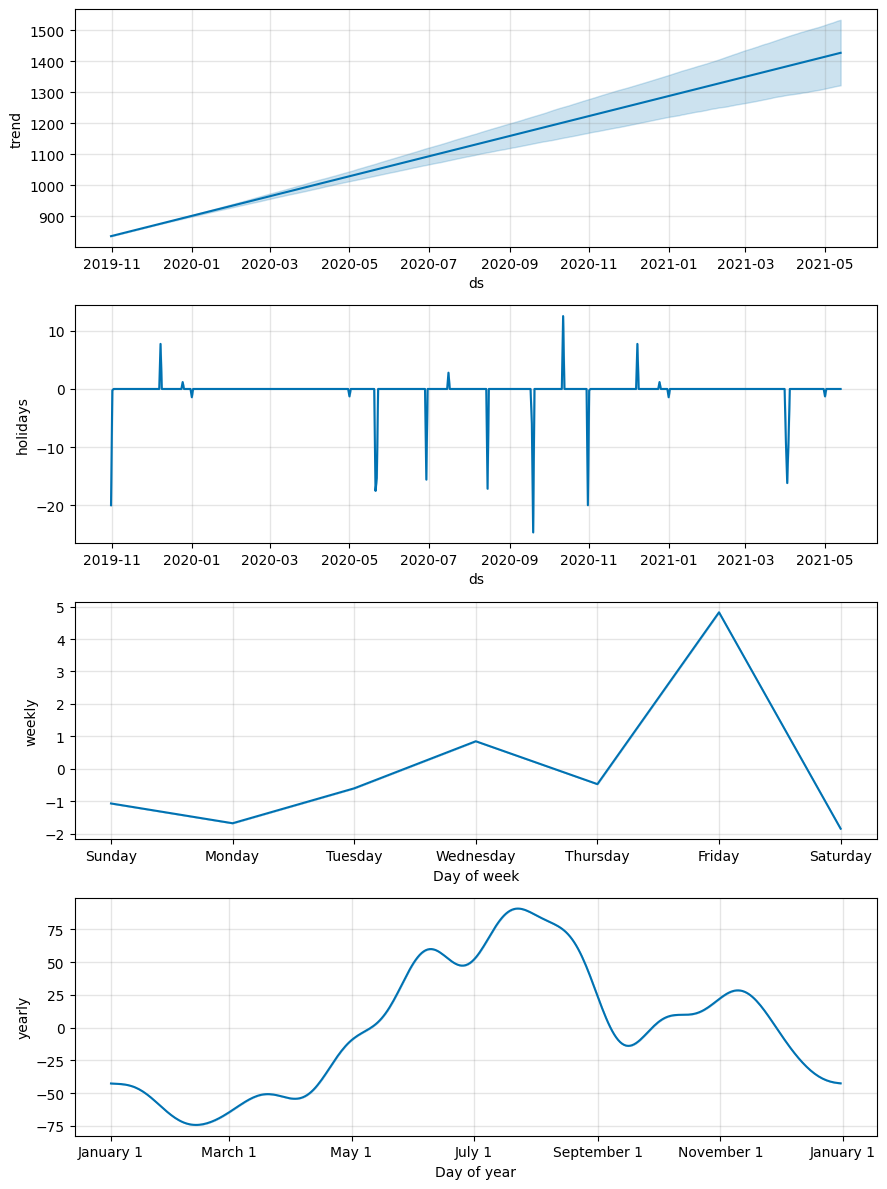

In [357]:
#plot de componentes
fig = new_model.plot_components(new_forecast)

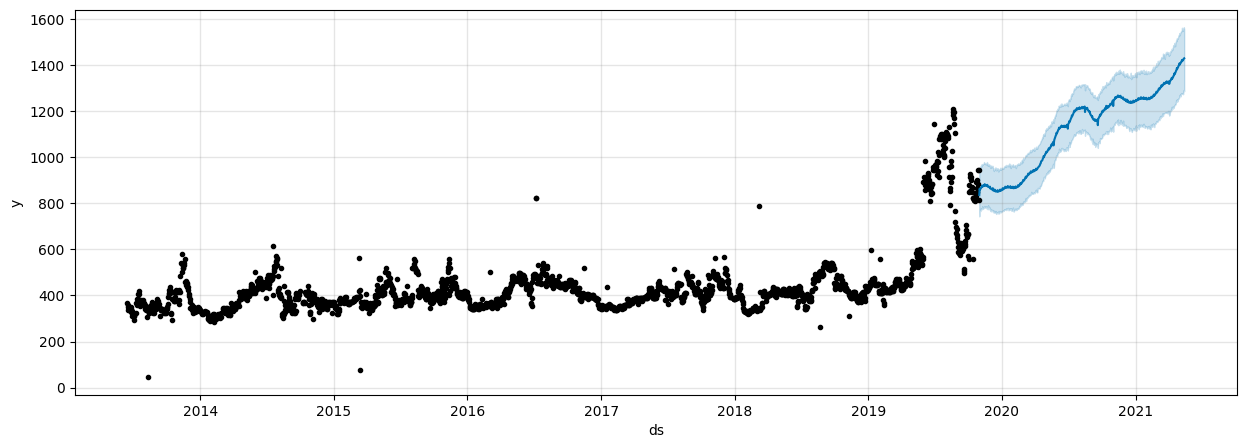

In [349]:
#plot de predicci√≥n
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = new_model.plot(new_forecast, ax=ax)
plt.show()

Podemos verificar que no hay una diferencia notable dentro de los gr√°ficos obtenidos. Sin embargo, al ahora incluir las festividades dentro del modelo, podemos identificar en qu√© fechas se produce un aumento o disminuci√≥n en el precio de los alimentos viendo la componente de *holidays*.

In [358]:
# M√©tricas del modelo con las festividades
y_true2 = df_new_test['y']
y_pred2 = new_forecast['yhat']

# Calculo de las m√©tricas
rmse2 = mean_squared_error(y_true2, y_pred2, squared=False)
mae2 = mean_absolute_error(y_true2, y_pred2)
mape2 = mean_absolute_percentage_error(y_true2,y_pred2)

print("M√©tricas de Error del Segundo Modelo:")
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")
print(f"MAPE: {mape2}")

M√©tricas de Error del Segundo Modelo:
RMSE: 462.5591439205425
MAE: 413.0509694102218
MAPE: 0.8633461706551463


In [359]:
# Tabla de comparaci√≥n
modelo1 = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
modelo2 = {'RMSE': rmse2, 'MAE': mae2, 'MAPE': mape2}
df = pd.DataFrame([modelo1,modelo2], index=['Modelo Original', 'Modelo con festividades'])
print(df)

                               RMSE         MAE      MAPE
Modelo Original          460.075453  410.267599  0.858856
Modelo con festividades  462.559144  413.050969  0.863346


¬øSon m√°s precisas las predicciones? ¬øQu√© otro festividad podr√≠a afectar a los precios de las frutas y verduras?

Podemos verificar que los resultados cambiaron levemente entre ambos modelos; sin embargo, obtienen m√©tricas muy similares. A partir de estos resultados, podemos afirmar que la inclusi√≥n de estas festividades no aporta de manera significativa en este tipo de modelos, dado que las m√©tricas como RMSE, que se espera que sean m√°s bajas, aumentan con la inclusi√≥n de las festividades. Intentamos incluir todas las festividades relevantes para el an√°lisis, como la Semana Santa, dado que la gente religiosa no come carne durante esta semana, por lo que el precio de las verduras deber√≠a subir. Lo mismo sucede con las fiestas patrias y sus alimentos: dado que se consume mucha carne, es posible que estos tipos de alimentos bajen de valor, ya que es m√°s preciado comprar carne.

Adem√°s, con la funci√≥n *add_country_holidays* se agregaron m√°s festividades propias del pa√≠s (esta funci√≥n agrega por defecto las festividades de Chile) y, aun as√≠, al incluir estas festividades, el modelo no muestra mejoras.

![a](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExc2hudXZidDZ1YWFpcml5NTRjZXhkN3lnMGY0dXlwMHRjZmt6Nm50byZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/6v2UJRyFAsTXgvJrin/giphy.gif)



#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas m√°s caras que otras. Adem√°s, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendr√°n que:
 1. Crear regresor con 1 y 0's seg√∫n corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los a√±os. ‚úÖ
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo ‚úÖ
 3. Entrenar y predecir. Gr√°ficar resultados. ‚úÖ

Para realizar esta secci√≥n nos basamos en la secci√≥n de ["Seasonality, Holiday Effects, And Regressors"](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors) de Prophet.

In [360]:
# Respuesta
# 1. Crear regresor con 1 y 0's seg√∫n corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los a√±os.

def fechas_invierno(ds):
    date = pd.to_datetime(ds)
    if (date.month == 6 and date.day >= 21) or (date.month in [7, 8]) or (date.month == 9 and date.day <= 21):
        return 1
    else:
        return 0

# 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
df_new_train['invierno'] = df_new_train['ds'].apply(fechas_invierno)
df_new_test['invierno'] = df_new_test['ds'].apply(fechas_invierno)

In [361]:
# Este bloque lo usamos para buscar fechas dentro del set de entrenamiento y verificar que estaba funcionando
# la funci√≥n (xd) que hicimos
fecha_buscar = '2016-06-27'
fechita = df_new_train[df_new_train['ds'] == fecha_buscar]
fechita

ds      y  invierno
996 2016-06-27  390.0         1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/3mywr7jr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_v8m7vl/6xzer_8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63797', 'data', 'file=/tmp/tmpw_v8m7vl/3mywr7jr.json', 'init=/tmp/tmpw_v8m7vl/6xzer_8x.json', 'output', 'file=/tmp/tmpw_v8m7vl/prophet_modelefzcehfz/prophet_model-20240527014344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


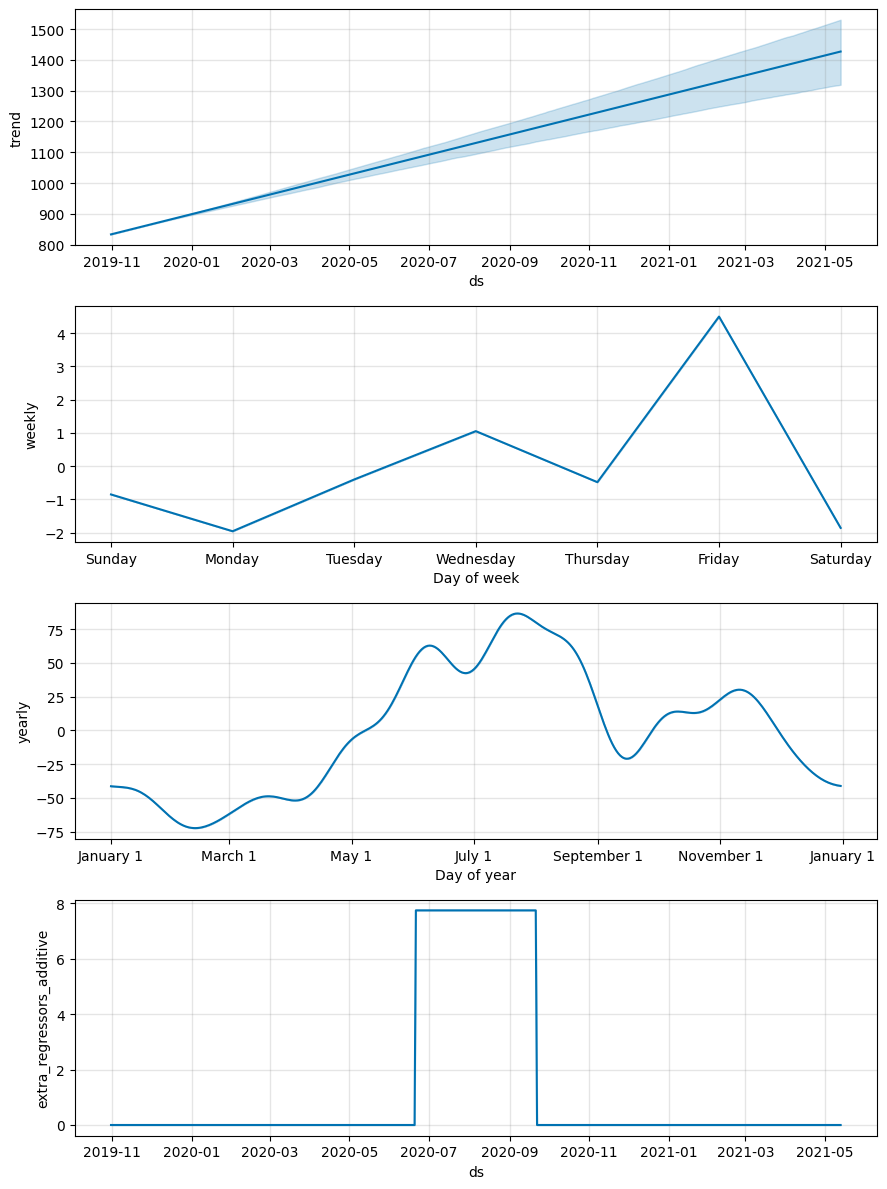

In [362]:
# 3. Entrenar y predecir. Gr√°ficar resultados.
final = Prophet()
final.add_regressor('invierno')
final.fit(df_new_train)
df_new_test['invierno'] = df_new_test['ds'].apply(fechas_invierno)
final_forecast = final.predict(df_new_test)
fig = final.plot_components(final_forecast)

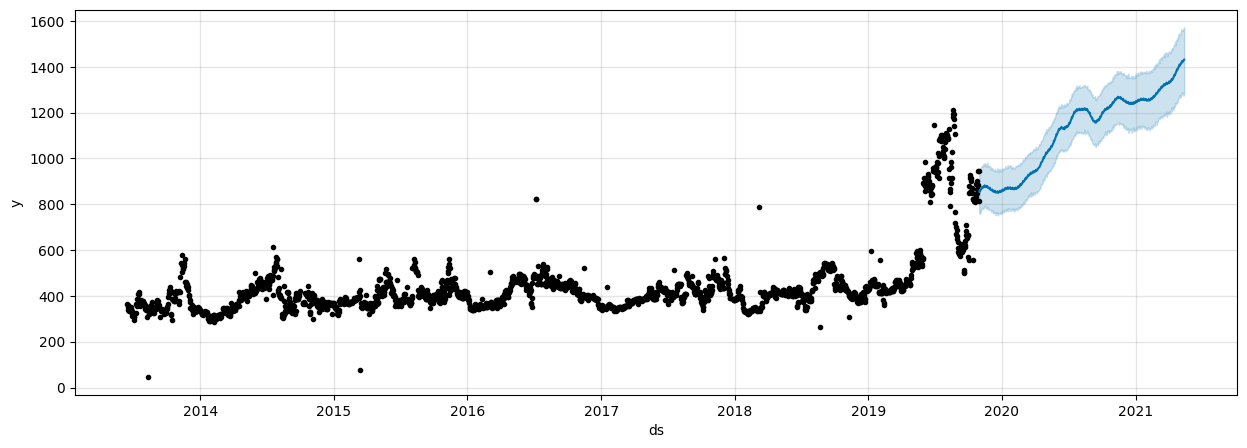

In [363]:
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final.plot(final_forecast, ax=ax)
plt.show()

Nuevamente, no se pueden verificar grandes cambios en el modelo al aplicar este regresor. Se puede identificar la estaci√≥n de invierno dentro de los componentes del modelo, donde se obtienen valores de 1 si se est√° dentro de esta estaci√≥n. Las predicciones siguen las mismas tendencias de los modelos anteriores. Las predicciones muestran un aumento en los a√±os predichos.

In [364]:
# M√©tricas del modelo con las festividades
y_true3 = df_new_test['y']
y_pred3 = final_forecast['yhat']

# Calculo de las m√©tricas
rmse3 = mean_squared_error(y_true3, y_pred3, squared=False)
mae3 = mean_absolute_error(y_true3, y_pred3)
mape3 = mean_absolute_percentage_error(y_true3,y_pred3)

print("M√©tricas de Error del Segundo Modelo:")
print(f"RMSE: {rmse3}")
print(f"MAE: {mae3}")
print(f"MAPE: {mape3}")

M√©tricas de Error del Segundo Modelo:
RMSE: 463.90978731862816
MAE: 414.3503357255997
MAPE: 0.8654994899228355


In [365]:
# Tabla de comparaci√≥n
modelo1 = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
modelo2 = {'RMSE': rmse2, 'MAE': mae2, 'MAPE': mape2}
modelo3 = {'RMSE': rmse3, 'MAE': mae3, 'MAPE': mape3}
df = pd.DataFrame([modelo1,modelo2,modelo3], index=['Modelo Original', 'Modelo con festividades', 'Modelo con Regresor'])
print(df)

                               RMSE         MAE      MAPE
Modelo Original          460.075453  410.267599  0.858856
Modelo con festividades  462.559144  413.050969  0.863346
Modelo con Regresor      463.909787  414.350336  0.865499


Podemos verificar que, al agregar el regresor al modelo, las m√©tricas empeoran levemente, por lo que no se puede afirmar que se aumenta la precisi√≥n de predicci√≥n del modelo.

![a](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ3NxNjlqZXdxZTIyNjhtdTF3bGs0ZHR4N3Zqem40dmZnOGJoaTJieSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/8w68TkeqzDnLa/giphy.gif)

# **Sistemas de Recomendaci√≥n (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el h√°bito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podr√≠an servir, pero no sabe qu√© comprar, por lo que usted tendr√° que ayudarlo a buscar los elementos m√°s comprados por sus amigos para que √©l tambi√©n pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendaci√≥n por Ranking (baseline).
3. Recomendaci√≥n basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [3]:
# se instala surprise library
!pip install surprise

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357239 sha256=de25698a511c857c87a583b87b03cef8869d3ce212cb029b1c47d7f1b39b006e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [28]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mse

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID √∫nico de cada usuario
* `productId:` ID √∫nico de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [5]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

user_id  prod_id  rating
189     3188        0     5.0
200     4980        0     4.0
314     5374        0     5.0
389     6293        0     5.0
406     4879        0     3.0

### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un peque√±o an√°lisis exploratorio:

Reportar la cantidad de usuarios y productos √∫nicos ‚úÖ

In [6]:
# Respuesta
print(f"Cantidad de usuarios √∫nicos: {df['user_id'].nunique()}")
print(f"Cantidad de productos √∫nicos: {df['prod_id'].nunique()}")

Cantidad de usuarios √∫nicos: 8014
Cantidad de productos √∫nicos: 6727


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164007 entries, 189 to 7824221
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  164007 non-null  int64  
 1   prod_id  164007 non-null  int64  
 2   rating   164007 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.0 MB


Verificar que no hayan valores nulos ‚úÖ

In [8]:
# Respuesta
df.isna().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

Graficar distribuci√≥n de los ratings ‚úÖ

In [9]:
print(f"Cantidad de ratings √∫nicos: {df['rating'].nunique()}")

Cantidad de ratings √∫nicos: 5


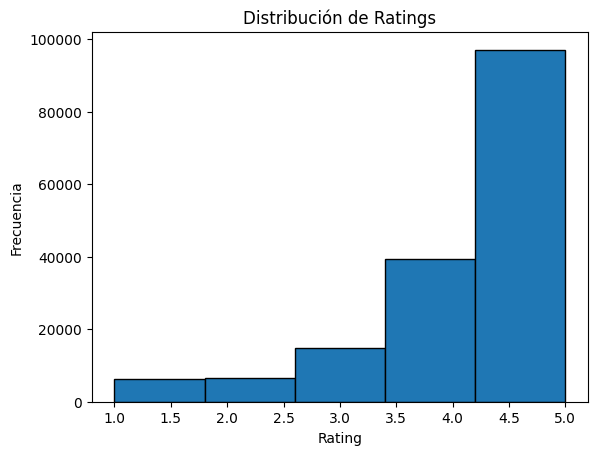

In [10]:
# Respuesta
plt.hist(df['rating'], bins=5, edgecolor='black') # 5 bines, porque hay solo 5 ratings
plt.title('Distribuci√≥n de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones ‚úÖ
- Top 5 de productos con mayores inteacciones ‚úÖ

In [11]:
# Respuesta
print(f" Top 5 usuarios con mayores interacciones: {df['user_id'].value_counts().head(5).index.tolist()}")
print(f" Top 5 productos con mayores interacciones: {df['prod_id'].value_counts().head(5).index.tolist()}")

 Top 5 usuarios con mayores interacciones: [6703, 5732, 6273, 1414, 4665]
 Top 5 productos con mayores interacciones: [5130, 2843, 5244, 2525, 6290]


In [12]:
df['user_id'].value_counts().head(5)

user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: count, dtype: int64

In [13]:
df['prod_id'].value_counts().head(5)

prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: count, dtype: int64

A partir de sus respuestas, escriba al menos 3 conclusiones. ‚úÖ

Escriba sus observaciones aqu√≠:

1.   Considerando que hay un total de 164,007 registros, hay una gran cantidad de personas, 8,014, que participan activamente en la compra de productos, que son 6,727, lo que sugiere que los usuarios de esta tienda interact√∫an con una gran variedad de productos.
2.   Podemos observar que los usuarios con mayores interacciones han comprado muchos productos, destacando el usuario 6703, quien ha adquirido 283 productos, superando en 66 productos al siguiente usuario. Esto sugiere que este primer usuario conf√≠a mucho en la tienda para realizar una cantidad tan exagerada de compras. En cuanto a los productos con mayores interacciones, el producto 5130 tiene 611 compras, lo que indica que es un producto muy codiciado y seguramente de buena calidad.
3.  Analizando las distribuciones de los ratings de los productos, es posible afirmar que la mayor√≠a de los productos est√°n concentrados en calificaciones de 3.5 a 5, por lo que se puede concluir que la tienda ofrece productos de calidad.



## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`. ‚úÖ

In [14]:
reader = Reader(rating_scale=(0,5))
df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise

In [15]:
from surprise.model_selection import train_test_split
# Respuesta
trainset, testset = train_test_split(dataset, test_size=0.3, random_state = 42) #30% al conjunto de test

## **2.3 Baseline**

El objetivo de esta secci√≥n es generar un *baseline* en las recomendaciones a partir de una aproximaci√≥n *dummy* para resolver el problema de recomendaci√≥n. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento ‚úÖ
- Generar predicciones usando el modelo entrenado ‚úÖ
- Evaluar predicciones usando el error cuadr√°tico medio. Entregue una interpretaci√≥n de su resultado ‚úÖ

In [16]:
from surprise.prediction_algorithms.random_pred import NormalPredictor
help(NormalPredictor)

Help on class NormalPredictor in module surprise.prediction_algorithms.random_pred:

class NormalPredictor(surprise.prediction_algorithms.algo_base.AlgoBase)
 |  Algorithm predicting a random rating based on the distribution of the
 |  training set, which is assumed to be normal.
 |  
 |  The prediction :math:`\hat{r}_{ui}` is generated from a normal distribution
 |  :math:`\mathcal{N}(\hat{\mu}, \hat{\sigma}^2)` where :math:`\hat{\mu}` and
 |  :math:`\hat{\sigma}` are estimated from the training data using Maximum
 |  Likelihood Estimation:
 |  
 |  .. math::
 |      \hat{\mu} &= \frac{1}{|R_{train}|} \sum_{r_{ui} \in R_{train}}
 |      r_{ui}\\\\        \hat{\sigma} &= \sqrt{\sum_{r_{ui} \in R_{train}}
 |      \frac{(r_{ui} - \hat{\mu})^2}{|R_{train}|}}
 |  
 |  Method resolution order:
 |      NormalPredictor
 |      surprise.prediction_algorithms.algo_base.AlgoBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type

In [17]:
# Respuesta
baseline_model = NormalPredictor()
baseline_model.fit(trainset)

In [29]:
prediction = baseline_model.test(testset)
prediction[1:10]

[Prediction(uid=6665, iid=5810, r_ui=4.0, est=3.6690945660973826, details={'was_impossible': False}),
 Prediction(uid=3315, iid=5232, r_ui=4.0, est=3.480875208595882, details={'was_impossible': False}),
 Prediction(uid=2051, iid=2892, r_ui=5.0, est=3.726597955810721, details={'was_impossible': False}),
 Prediction(uid=6170, iid=2929, r_ui=5.0, est=4.130049123058346, details={'was_impossible': False}),
 Prediction(uid=132, iid=401, r_ui=4.0, est=5, details={'was_impossible': False}),
 Prediction(uid=5449, iid=1774, r_ui=5.0, est=3.1378558297901886, details={'was_impossible': False}),
 Prediction(uid=5954, iid=6010, r_ui=5.0, est=4.6230646320147795, details={'was_impossible': False}),
 Prediction(uid=1607, iid=4630, r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid=6546, iid=5245, r_ui=5.0, est=4.856967759719171, details={'was_impossible': False})]

In [30]:
# Evaluar con MSE
accuracy.mse(prediction)

MSE: 1.7732


1.7731540515588065

In [31]:
# Evaluar con MAE
accuracy.mae(prediction)

MAE:  0.9876


0.9875601934606457

Podemos verificar que el modelo obtiene m√©tricas *altas*, lo cual tiene sentido dado que al utilizar un **NormalPredictor** se est√°n generando predicciones sin usar informaci√≥n espec√≠fica, es decir, sin considerar detalles sobre el usuario o los productos de la tienda. De un modelo de este estilo se esperan m√©tricas bajas para asegurar que las predicciones son correctas. Por ejemplo, se espera que el MSE sea bajo; cuanto m√°s bajo o cercano a 0, mejor (sin sobreajustar, obviamente), ya que calcula el error entre el dato real y la predicci√≥n generada sobre este.

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta secci√≥n, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En espec√≠fico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario ‚úÖ
- Filtro Colaborativo KNN enfocado en el Producto ‚úÖ
- Use `KNNBasic` y similitud coseno para ambos modelos ‚úÖ

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øQu√© enfoque tienen un mejor rendimiento? ¬øSe alcanza un mejor rendimiento con respecto al Baseline? ‚úÖ
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©? ‚úÖ
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados. ‚úÖ

*Hint: Le podr√≠a servir apoyarse de esta [documentaci√≥n](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [21]:
def get_user_top_k(predictions, user, k = 10):
  # Predecir los rating filtrados por usuario user
  # Recordemos que predictions ser√° un dataframe al final del modelo
  predicted_ratings = predictions[predictions['user_id'] == user]

  # Ordenar las predicciones
  sorted_predicted_ratings = predicted_ratings.sort_values(by = 'predicted_rating', ascending = False)
  # Dado que el return tiene un formato de lista y no de dataframe, lo pasamos a una lista
  sorted_predicted_ratings = sorted_predicted_ratings.values.tolist()

  return sorted_predicted_ratings[:k]

In [27]:
# Filtro Colaborativo KNN enfocado en el Usuario
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)

# entrenar

user_model.fit(trainset)

#predecir en dataframe de testeo
user_predictions = user_model.test(testset)

# retornar un dataframe con el rating estimado para cada (user_id, prod_id)
predictions =  pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in user_predictions], columns=['user_id', 'prod_id', 'predicted_rating'])

# obtener mse
mse(user_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122


1.212159526775385

In [23]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[[2170.0, 2679.0, 5.0],
 [2170.0, 1326.0, 4.799755049750801],
 [2170.0, 4650.0, 4.399861310283875],
 [2170.0, 1692.0, 4.333333333333333],
 [2170.0, 4363.0, 4.199459547276517]]

In [32]:
# entrenar algoritmo base a items, obtener MSE

sim_options = {'name': 'cosine',
               'user_based': False}

# algoritmo base a items.

item_model = KNNBasic(sim_options=sim_options)

# entrenar

item_model.fit(trainset)

#predecir en dataframe de testeo
item_predictions = item_model.test(testset)

predictions =  pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in item_predictions], columns=['user_id', 'prod_id', 'predicted_rating'])

# obtener mse
mse(item_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2328


1.23280223807978

In [251]:
example = [(3, 3906, None)]
print(item_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[[2170.0, 1692.0, 5.0],
 [2170.0, 1326.0, 5.0],
 [2170.0, 2679.0, 5.0],
 [2170.0, 3595.0, 4.857142857142857],
 [2170.0, 4650.0, 4.856937449847549]]


- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øQu√© enfoque tienen un mejor rendimiento? ¬øSe alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

  * Podemos verificar que las m√©tricas obtenidas corresponden al modelo **KNNBasic** con un enfoque en el usuario, ya que obtiene un MSE menor en comparaci√≥n con otros modelos, aunque sigue siendo un valor mayor a 1. Ambos modelos superan ligeramente el rendimiento del **NormalPredictor**, que tiene un MSE aproximado de 1.7732. Los modelos **KNNBasic** logran m√©tricas de MSE aproximadas a 1.2122 (enfoque en el usuario) y 1.2328 (enfoque en el producto), que corresponde a una mejora significativa.

  * Podemos verificar que la predicci√≥n del modelo **KNNBasic** con enfoque en el usuario (3.38) coincide m√°s cercanamente con el registro original (3) en comparaci√≥n con el valor que entrega el mismo modelo con enfoque en el producto, donde su predicci√≥n (2.5) se desv√≠a m√°s del original (4). Esto puede tratar de explicarse dado que los usuarios de la tienda tiene gustos diferentes pero poseen cierta afinidad en los tipos de productos que compran.

  * Aunque el modelo con enfoque en el usuario entrega las mejores m√©tricas, el modelo con enfoque en √≠tems proporciona recomendaciones con mejores calificaciones, entregando 3 de 5 recomendaciones con una calificaci√≥n de 5, a diferencia del modelo con enfoque en el usuario que solo entrega 1.

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego eval√∫e sus predicciones en el conjunto de test. Luego, responda:

- ¬øEn qu√© se diferencia este tipo de modelos de los modelos basados en memoria?
- ¬øQu√© significa el par√°metro `num_factors`? ¬øDe qu√© manera podr√≠a impactar en el ajuste del modelo?
- ¬øQu√© indican los par√°metros $\mu$, $b_u$, $b_i$? ¬øQu√© cuidado se debe tener al utilizarlos?
- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øSe alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [33]:
# Respuesta

model = SVD()

model.fit(trainset)

svd_pred = model.test(testset)

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)

predictions = pd.DataFrame([(pred.uid, pred.iid, pred.est) for pred in svd_pred], columns=['user_id', 'prod_id', 'predicted_rating'])

In [34]:
mse(svd_pred)

MSE: 0.9104


0.9103547851880529

In [253]:
# calcular mae
from surprise.accuracy import mae
mae(svd_pred)

MAE:  0.6954


0.6953666458709473

In [35]:
example = [(3, 3906, None)]
print(model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.1466908669792306, details={'was_impossible': False})]


[[2170.0, 1692.0, 5.0],
 [2170.0, 1326.0, 4.812853111515066],
 [2170.0, 4650.0, 4.715130221572334],
 [2170.0, 5990.0, 4.670920691519073],
 [2170.0, 4363.0, 4.611615162767381]]

- ¬øEn qu√© se diferencia este tipo de modelos de los modelos basados en memoria?
- ¬øQu√© significa el par√°metro `num_factors`? ¬øDe qu√© manera podr√≠a impactar en el ajuste del modelo?
- ¬øQu√© indican los par√°metros $\mu$, $b_u$, $b_i$? ¬øQu√© cuidado se debe tener al utilizarlos?
- Obtenga el error cuadr√°tico medio de sus recomendaciones y comente. ¬øSe alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¬øSon diferentes sus resultados? ¬øPorqu√©?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

  * Los modelos basados en memoria usan los datos tal como est√°n en la matriz usuario-producto y se centran en encontrar vecinos cercanos, como con el algoritmo KNN. Por otro lado, los modelos basados en modelo suponen que hay un proceso detr√°s de las interacciones entre usuarios y productos, y tratan de entender y modelar este proceso para hacer mejores predicciones. (Sacado directamente de la clase 17)

  * *num_factor* representa la cantidad de factores latentes que se pueden  utilizar para describir a los usuarios e √≠tems. Un valor alto permite obtener relaciones m√°s complejas entre los datos, sin embargo, puede aumentar de manera significativa la complejidad computacional del modelo, su entrenamiento y su testeo! Por lo que se tiene que buscar alg√∫n valor √≥ptimo para utilizar.

  * $\mu$: Representa el sesgo global promedio de todas las calificaciones en el conjunto de datos, $b_u$ : Representa el sesgo de los usuarios, es decir, la tendencia de ciertos usuarios a calificar m√°s alto o m√°s bajo que el promedio, $b_i$ : Representa el sesgo de los √≠tems, es decir, la tendencia de ciertos √≠tems a recibir calificaciones m√°s altas o m√°s bajas que el promedio. Hay que tener cuidado al definir estos par√°metros dado que estos pueden introducir sesgos en los resultados del modelo, por ejemplo, si un usuario tiende a calificar m√°s alto que el promedio (a pesar de los productos no sean de tan buena calidad, y lo haga obviamente de buena fe), el sesgo del usuario puede influir en las predicciones.

  * Con respecto al modelo original de **NormalPredictor**, se puede verificar que este modelo lo supera indiscutiblemente; obteniendo m√©tricas de bajo valor, lo que indica que las predicciones obtenidas se ajustan a la realidad. De un valor de 1.7732 a uno de 0.9104 hay un clara mejora.

  * No supe como responder bien estas partes porque asumo que son copiadas de la parte anterior (ahora no hay dos modelos como antes): sin embargo, podemos notar que las recomendaciones para el usuario no poseen tantos ratings con valores de 5 como el modelo anterior a este de **KNNBasic**, y no se puede verificar cual era el rating original dado que en este modelo con example no se obtiene un actual_k.

###**Comentarios Finales**

* ¬øQu√© sistema de recomendaci√≥n presenta mejores m√©tricas? ¬øA qu√© se podr√≠a deber esto?
* ¬øEs posible mejorar sus resultados? Si es as√≠, proponga al menos 2 mejoras.

El modelo SVD presenta mejores m√©tricas en comparaci√≥n con los otros modelos, debido a la complejidad que tiene en cuenta al calcular las predicciones. A diferencia de los otros modelos, que son m√°s simples al considerar distancias/similitudes (KNNBasic) o generar predicciones de manera aleatoria (NormalPredictor).

Si deseamos mejorar estos resultados, como argumentamos anteriormente, podemos buscar un valor √≥ptimo para *num_factors* que ayude a capturar las relaciones intr√≠nsecas y m√°s complejas de los datos. Por lo tanto, podr√≠amos realizar una b√∫squeda de hiperpar√°metros sobre el modelo. Adem√°s, podr√≠amos incorporar datos que ayuden a caracterizar tanto a los usuarios, como su edad, pa√≠s de origen, entre otros, y a los productos, como su categor√≠a, pa√≠s de origen, entre otros, lo que podr√≠a contribuir a mejorar las predicciones.
